# Neural  Networks

In [1]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# test / train data
df = pd.read_csv("TSLA-Data.csv", header=0, na_values='?')
df = df.dropna()
y = np.array(df['Close'])

# validation data 
df2 = pd.read_csv("TSLA-2019.csv", header=0, na_values='?')
df2 = df2.dropna()
y2 = np.array(df2['Close'])

# combined data
df3 = pd.concat([df, df2])
X_combined = np.array(df3[['Open', 'High', 'Low', 'Volume']])
days = np.arange(X_combined.shape[0]).reshape(X_combined.shape[0], 1)
X_combined = np.hstack((days, X_combined))
# Scale combined data
X_combined = StandardScaler().fit_transform(X_combined)

# Extract the traning / testing sets and the validation set
X = X_combined[:df.shape[0], ]
X2 = X_combined[df.shape[0]:, ]

In [3]:
# Split training set data. 75/25
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)

(1606, 5)
(1606,)


In [4]:
# Function that plots closed vs predicted close
def plot_cvp(days, y_actual, yhat, title='Actual vs Model'):
    plt.figure(figsize=(15,7))
    plt.title(title)
    plt.xlabel('Days (Scaled)')
    plt.ylabel('Close Price')
    plt.scatter(days, y_actual)
    plt.scatter(days, yhat)
    plt.legend(['Actual', 'Predicted'])
    plt.show()

In [5]:
# Function to print the coeff of determination of the models
def print_R2(model, x_train, y_train, x_test, y_test, X2, y2):
    R2_train = model.score(x_train, y_train)
    print('Train R2: ', R2_train)
    R2_test = model.score(x_test, y_test)
    print('Test R2: ', R2_test)
    R2 = model.score(X2, y2)
    print('2019 R2: ', R2)

# NN with logistic function (No Regularization)

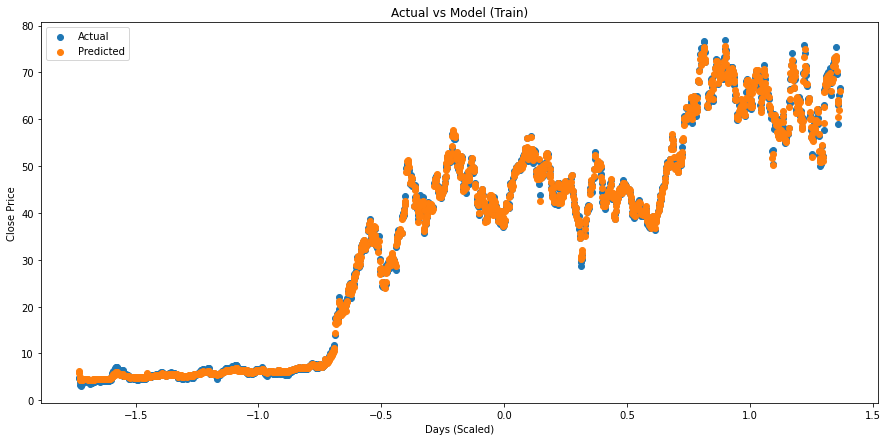

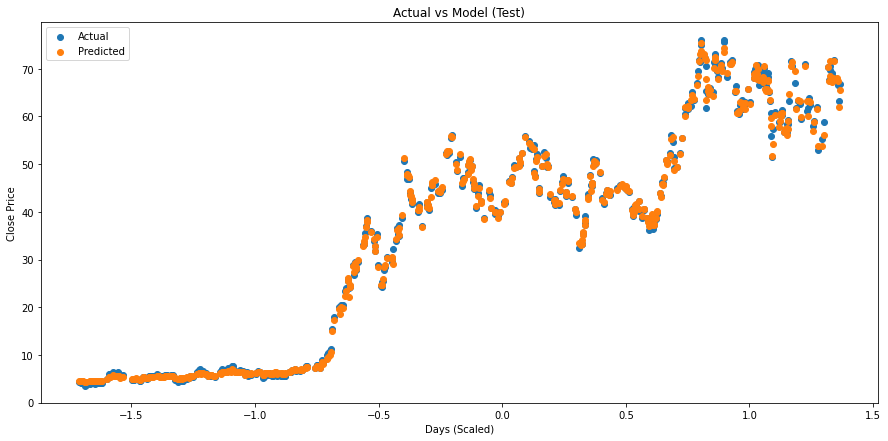

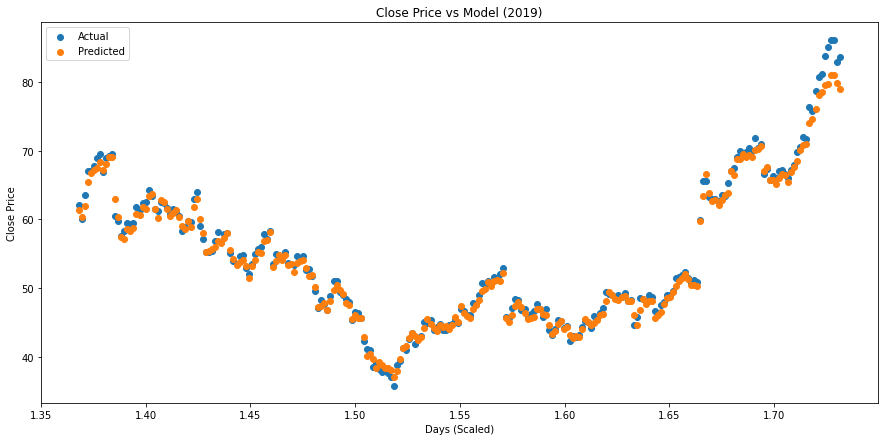

In [6]:
# Train the model(using logistic function)
mlp_log = MLPRegressor(hidden_layer_sizes=(30), activation='logistic', solver='adam', max_iter=10000, alpha=0)
mlp_log.fit(x_train, y_train)

# Plot y_train and yhat_train
yhat_train = mlp_log.predict(x_train)
plot_cvp(x_train[:, 0], y_train, yhat_train, 'Actual vs Model (Train)')

# Plot y_test and yhat_test
yhat_test = mlp_log.predict(x_test)
plot_cvp(x_test[:, 0], y_test, yhat_test, 'Actual vs Model (Test)')

# Plot actual vs pred of 2019 data
yhat = mlp_log.predict(X2)
plot_cvp(X2[:, 0], y2, yhat, 'Close Price vs Model (2019)')

In [7]:
# Print NN R2 for model
print_R2(mlp_log, x_train, y_train, x_test, y_test, X2, y2)

Train R2:  0.999436979235277
Test R2:  0.9993082095801117
2019 R2:  0.9901140380890675


# Regularization

In [8]:
def regularization(function, x_train, y_train, x_test, y_test, X2, y2):
    lambdas = np.geomspace(0.001, 10, 5)
    R2_tr = []
    R2_ts = []
    R2_v = []
    # loop through possibilities of lambda
    for val in lambdas:
        # Get model type
        model = MLPRegressor(hidden_layer_sizes=(30), activation=function, solver='adam', max_iter=10000, alpha=val)
        # Train model
        model.fit(x_train, y_train)

        # Graph Close vs Prediction with 2019 data
        yhat = mlp_log.predict(X2)
        plot_cvp(X2[:, 0], y2, yhat, 'Close Price vs Model (2019)')
       
        # Print lambda and R2
        print('lambda = {}'.format(val))

        # store all R2 values and print them
        R2_train = model.score(x_train, y_train)
        R2_tr.append(R2_train)
        print('Train R2: ', R2_train)
        
        R2_test = model.score(x_test, y_test)
        R2_ts.append(R2_test)
        print('Test R2: ', R2_test)
        
        R2 = model.score(X2, y2)
        R2_v.append(R2)
        print('2019 R2: ', R2)
    
    return lambdas, R2_tr, R2_ts, R2_v


# NN with logistic function (L2 Regularization)

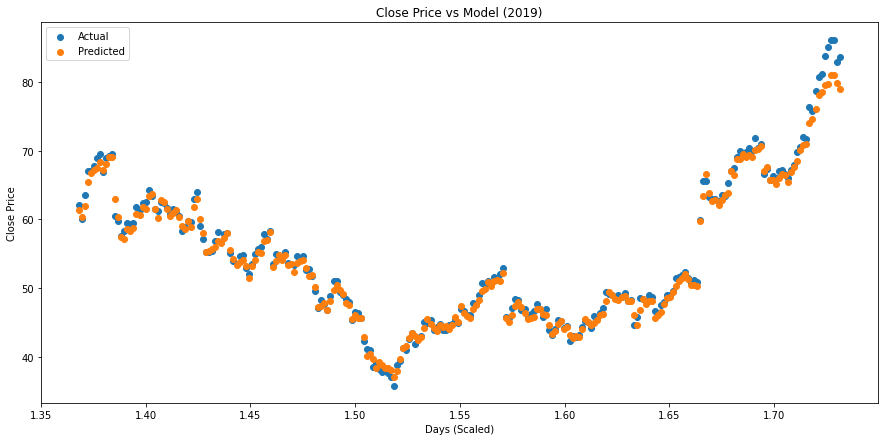

lambda = 0.001
Train R2:  0.9992979057719878
Test R2:  0.9991899621912648
2019 R2:  0.9882120535205519


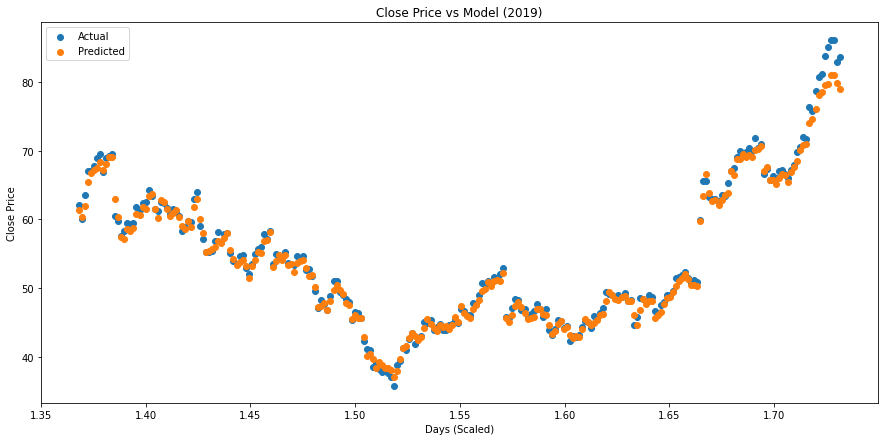

lambda = 0.01
Train R2:  0.9993808018282032
Test R2:  0.9992593219167197
2019 R2:  0.9883154834865878


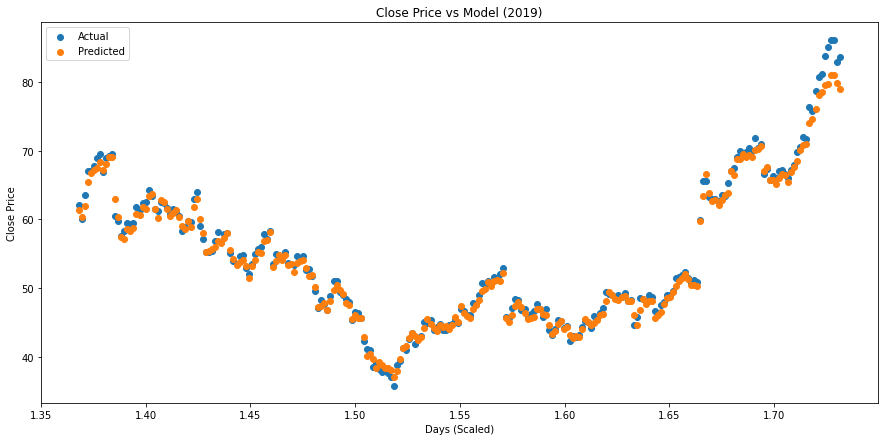

lambda = 0.1
Train R2:  0.9992185608226801
Test R2:  0.9991340585480613
2019 R2:  0.9844854692379778


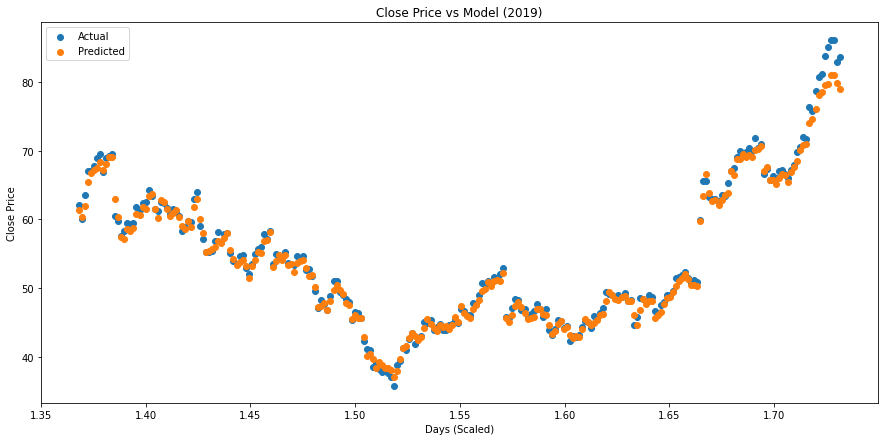

lambda = 1.0
Train R2:  0.9981151707025699
Test R2:  0.9981846157276741
2019 R2:  0.95925297742866


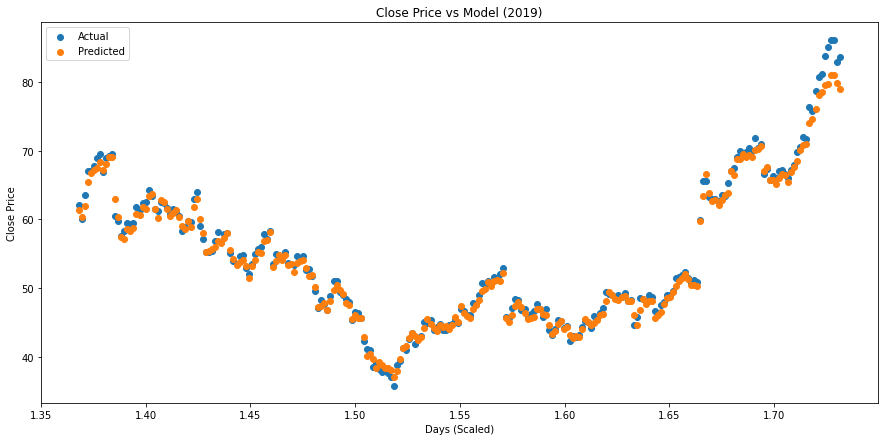

lambda = 10.0
Train R2:  0.9867181092667932
Test R2:  0.9864275290948081
2019 R2:  0.7026296276242812


In [9]:
lambdas, R2_tr, R2_ts, R2_v = regularization('logistic',x_train, y_train, x_test, y_test, X2, y2)

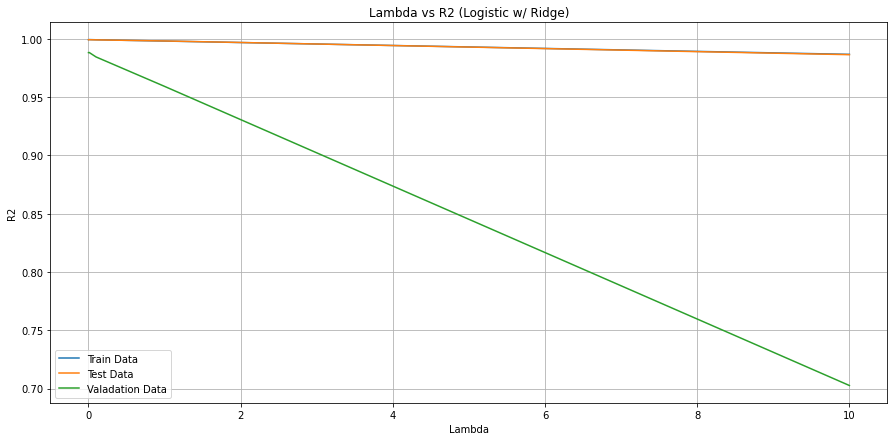

In [10]:
# Plot R2 value graph based on lambda
plt.figure(figsize=(15,7))
plt.title('Lambda vs R2 (Logistic w/ Ridge)')
plt.xlabel('Lambda')
plt.ylabel('R2')
plt.plot(lambdas, R2_tr)
plt.plot(lambdas, R2_ts)
plt.plot(lambdas, R2_v)
plt.legend(['Train Data', 'Test Data', 'Valadation Data'])
plt.grid()
plt.show()

# NN with Relu function (No Regularization)

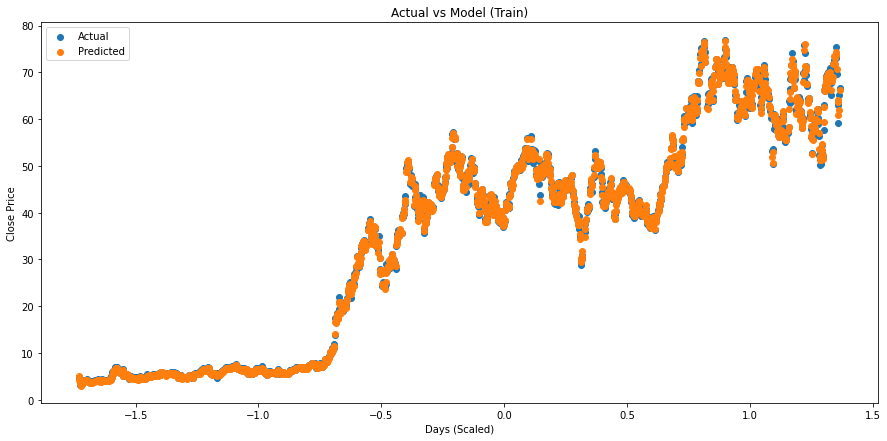

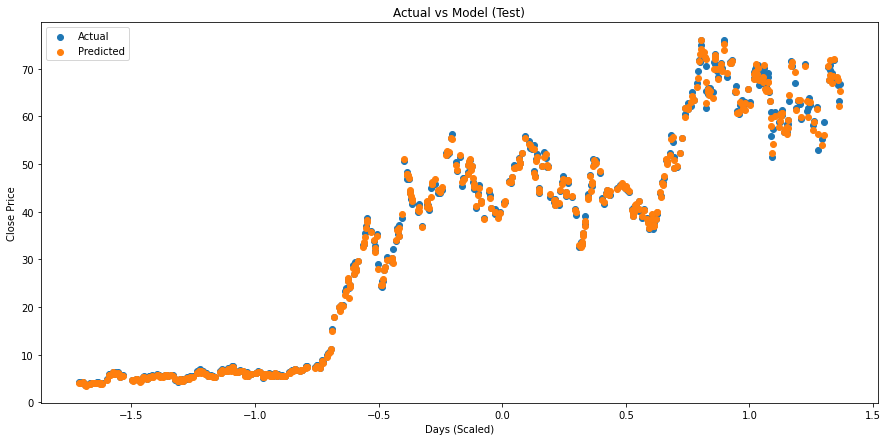

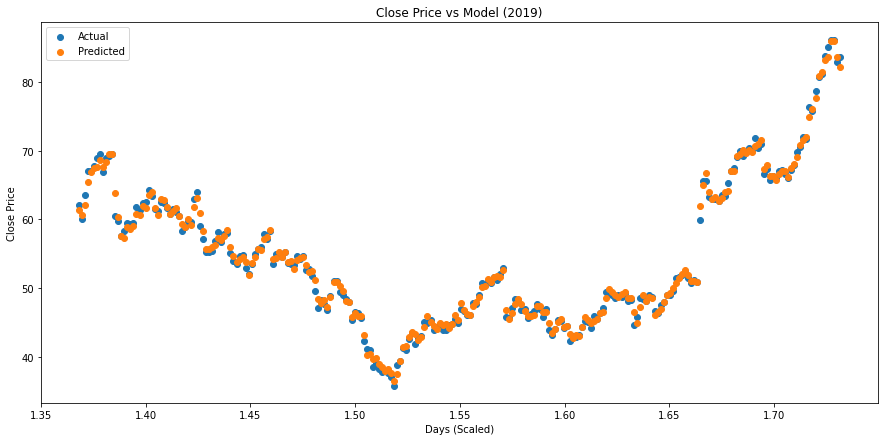

In [11]:
# Train the model(using relu function)
mlp_rl = MLPRegressor(hidden_layer_sizes=(30), activation='relu', solver='adam', max_iter=10000, alpha=0)
mlp_rl.fit(x_train, y_train)

# Plot y_train and yhat_train
yhat_train = mlp_rl.predict(x_train)
plot_cvp(x_train[:, 0], y_train, yhat_train, 'Actual vs Model (Train)')

# Plot y_test and yhat_test
yhat_test = mlp_rl.predict(x_test)
plot_cvp(x_test[:, 0], y_test, yhat_test, 'Actual vs Model (Test)')

# Plot actual vs pred of 2019 data
yhat = mlp_rl.predict(X2)
plot_cvp(X2[:, 0], y2, yhat, 'Close Price vs Model (2019)')

In [12]:
# Print NN R2 for model
print_R2(mlp_rl, x_train, y_train, x_test, y_test, X2, y2)

Train R2:  0.9995286465778341
Test R2:  0.9993596004657465
2019 R2:  0.9961434725337466


# NN with Relu function (L2 Regularization)

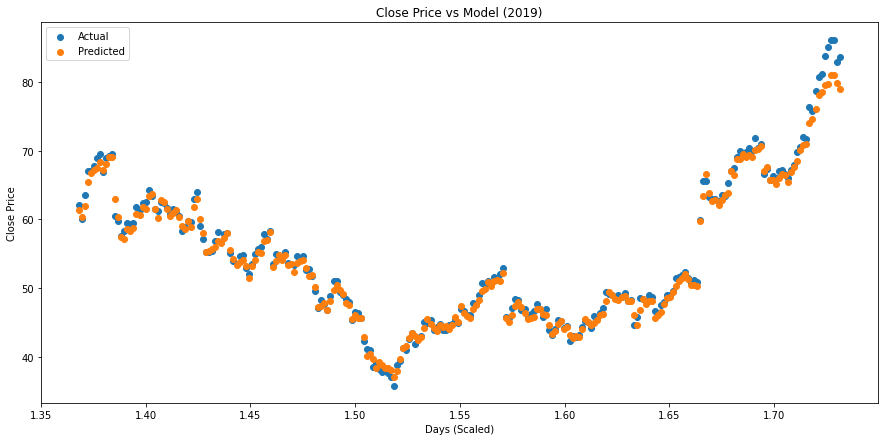

lambda = 0.001
Train R2:  0.9993387049243597
Test R2:  0.9991456824513514
2019 R2:  0.9952428316940525


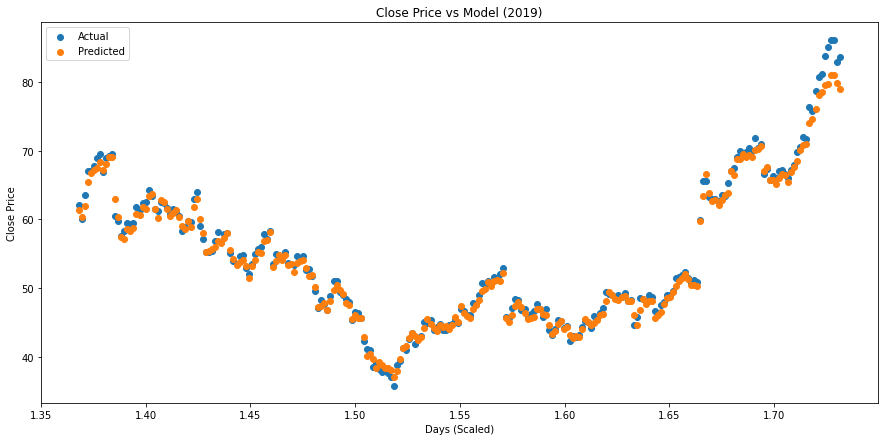

lambda = 0.01
Train R2:  0.9992562276021345
Test R2:  0.9990890958265614
2019 R2:  0.9952955193124847


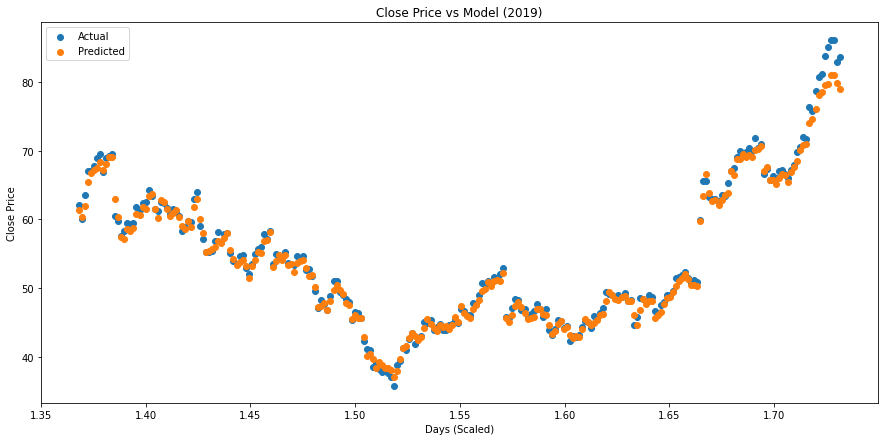

lambda = 0.1
Train R2:  0.9993593666015977
Test R2:  0.9991399487058787
2019 R2:  0.9947938957899193


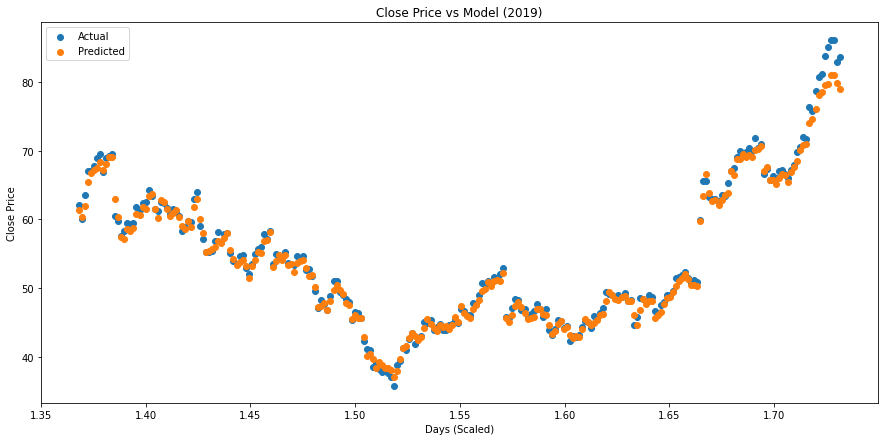

lambda = 1.0
Train R2:  0.9993764385558527
Test R2:  0.9992415682513767
2019 R2:  0.9954477810223


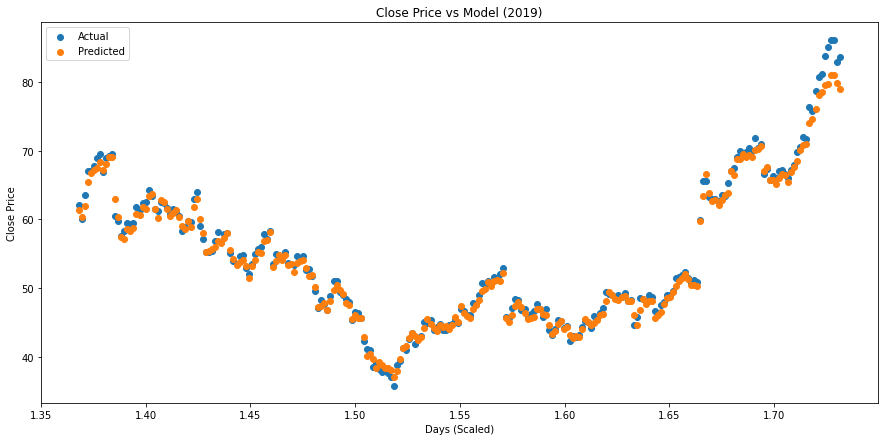

lambda = 10.0
Train R2:  0.9990841218489535
Test R2:  0.9990334425054229
2019 R2:  0.9897988638583194


In [13]:
lambdas, R2_tr, R2_ts, R2_v = regularization('relu',x_train, y_train, x_test, y_test, X2, y2)

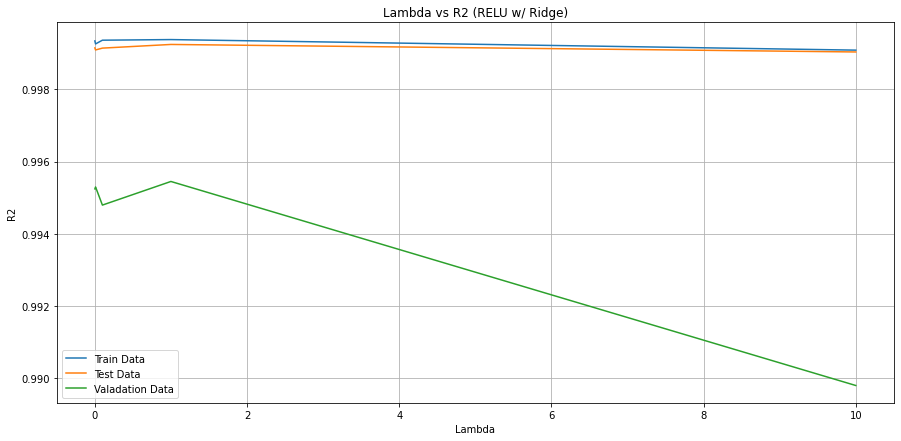

In [14]:
# Plot R2 value graph based on lambda
plt.figure(figsize=(15,7))
plt.title('Lambda vs R2 (RELU w/ Ridge)')
plt.xlabel('Lambda')
plt.ylabel('R2')
plt.plot(lambdas, R2_tr)
plt.plot(lambdas, R2_ts)
plt.plot(lambdas, R2_v)
plt.legend(['Train Data', 'Test Data', 'Valadation Data'])
plt.grid()
plt.show()